Importing Libreries

In [1]:
"""
Description:
    Solving and analyzing the problem of diabetic patients by clustering and classification method
    "Diabetes 130-US hospitals for years 1999-2008 Data Set"
    Project for Amirkabir University of Technilogy (Tehran Polytechnic)
    Computer Scince department
    Artificial Inteligence Course

Student Name & ID: Pouria Alimoradpor 9912035
"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

load Data

In [2]:
df = pd.read_csv("dataset_diabetes/diabetic_data.csv")

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Pre-Processing

In [6]:
# Replace by NaN
for d in ['?', 'Other', 'Unknown/Invalid']:
    df.replace(d, np.nan, inplace=True)
# Drop irrelevant columns
df.drop(['encounter_id', 'patient_nbr', 'payer_code', 'weight', 'medical_specialty'], axis=1, inplace=True)
# Drop columns with more than 40% missing values
df.dropna(thresh=len(df)*0.6, axis=1, inplace=True)
# Drop rows with missing values
df.dropna(inplace=True)

In [7]:
# Checking null values, if any
df.isnull().values.any() 

False

Data-Visualization

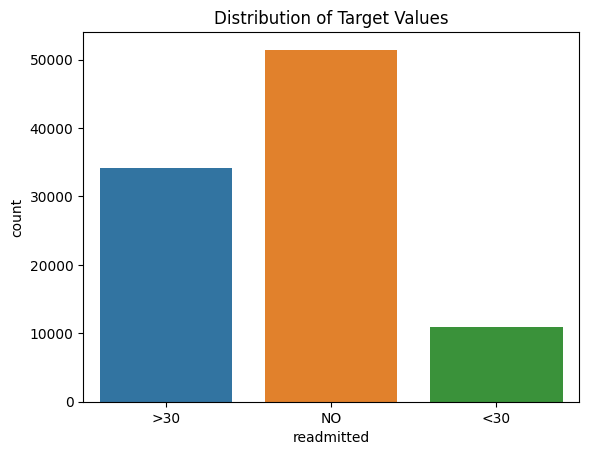

<AxesSubplot: >

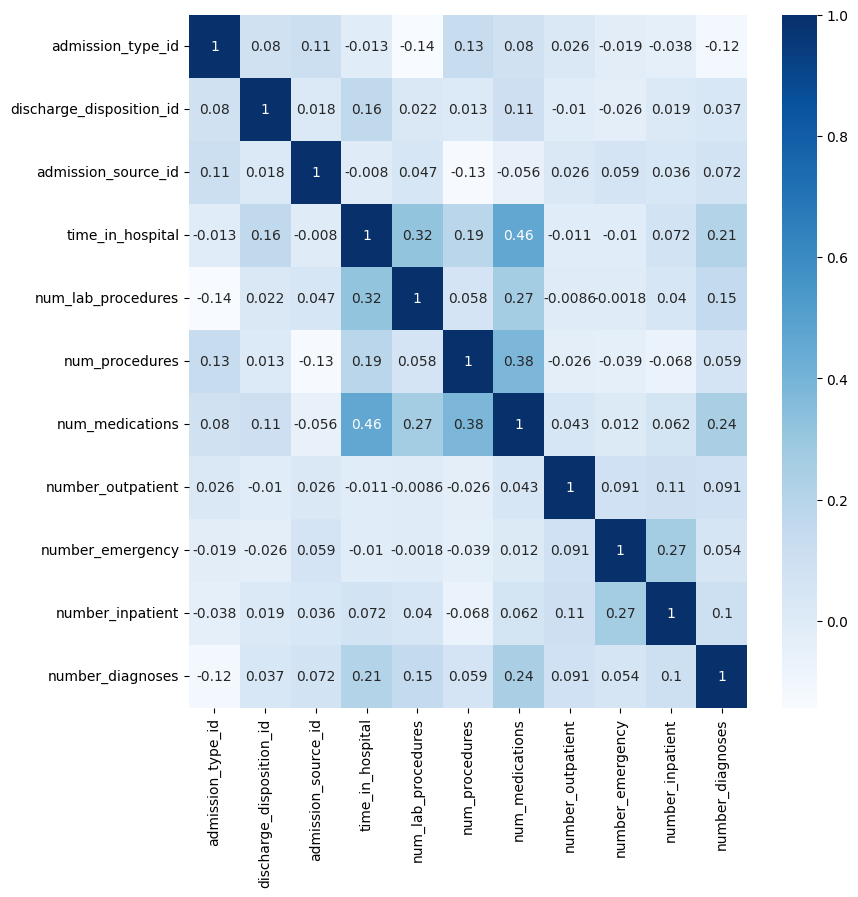

In [8]:
sns.countplot(x = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.show()

plt.figure(figsize=(9,9))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='Blues')

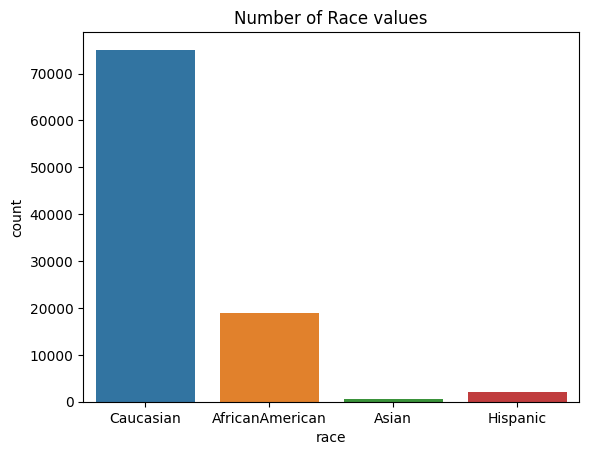

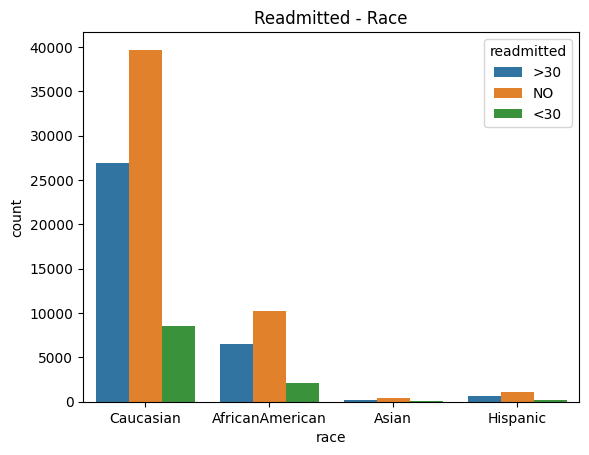

In [9]:
# Race
sns.countplot(x = "race", data = df)
plt.title("Number of Race values")
plt.show()

sns.countplot(x = "race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

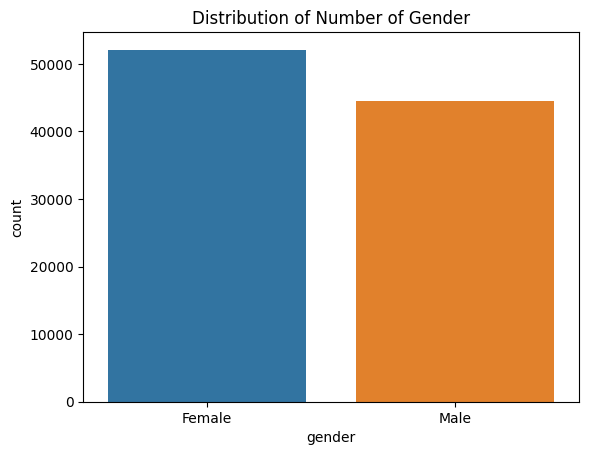

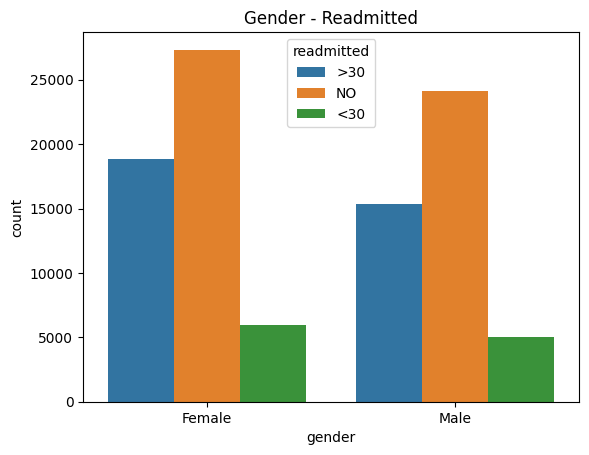

In [10]:
# Gender
sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

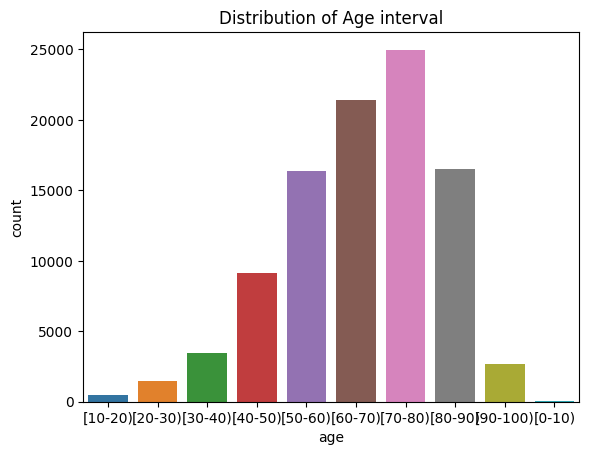

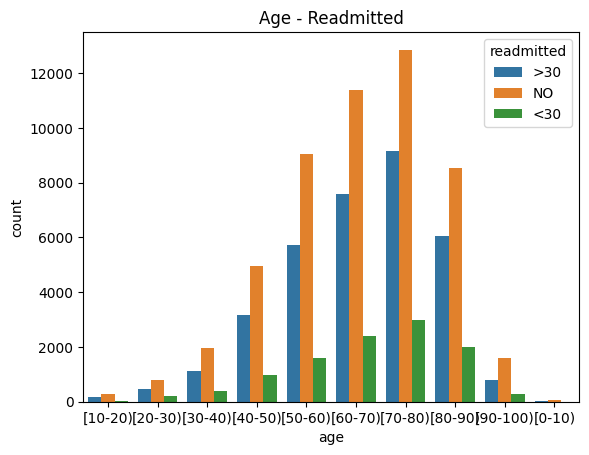

In [11]:
# Age
sns.countplot(x = "age", data = df)
plt.title("Distribution of Age interval")
plt.show()

sns.countplot(x = "age", hue = "readmitted", data = df)
plt.title("Age - Readmitted")
plt.show()

Split Data

In [24]:
# Split data into training and testing sets
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Encoding categorical data
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Feature normalization
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_test = normalize(X_test)

Classify

In [25]:
# Train KNN classifier on the data
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
# Evaluate model on the testing set
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

ValueError: X has 1721 features, but KNeighborsClassifier is expecting 2273 features as input.

Cluster

In [ ]:
# Perform clustering using k-means algorithm
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
# Predict the cluster for each data point
y_pred = kmeans.predict(X_test)
# Calculate silhouette_score
score = silhouette_score(X_test, y_pred)
print("Silhouette Score: ", score)